In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-6-0/sample_submission_storming_round.csv
/kaggle/input/data-storm-6-0/train_storming_round.csv
/kaggle/input/data-storm-6-0/test_storming_round.csv


In [3]:
df = pd.read_csv("/kaggle/input/data-storm-6-0/train_storming_round.csv")
test_df = pd.read_csv("/kaggle/input/data-storm-6-0/test_storming_round.csv")

In [12]:
# 2. Basic cleaning
row_ids = test_df['row_id']
df = df.drop(columns=['row_id', 'agent_code'], errors='ignore')
test_df = test_df.drop(columns=['row_id', 'agent_code'], errors='ignore')

In [7]:
from dateutil.relativedelta import relativedelta
import pandas as pd


# Convert to datetime
df['agent_join_month'] = pd.to_datetime(df['agent_join_month'], format='%m/%d/%Y')
df['first_policy_sold_month'] = pd.to_datetime(df['first_policy_sold_month'], format='%m/%d/%Y')

test_df['agent_join_month'] = pd.to_datetime(test_df['agent_join_month'], format='%m/%d/%Y')
test_df['first_policy_sold_month'] = pd.to_datetime(test_df['first_policy_sold_month'], format='%m/%d/%Y')

# Function to compute month difference
def diff_months(d1, d2):
    return (d2.year - d1.year) * 12 + d2.month - d1.month

# Apply to both dataframes
df['months_to_first_sale'] = df.apply(lambda row: diff_months(row['agent_join_month'], row['first_policy_sold_month']), axis=1)
test_df['months_to_first_sale'] = test_df.apply(lambda row: diff_months(row['agent_join_month'], row['first_policy_sold_month']), axis=1)

# Preview
df[['agent_join_month', 'first_policy_sold_month', 'months_to_first_sale']].head()


,agent_join_month,first_policy_sold_month,months_to_first_sale
0,2021-02-01,2023-09-01,31
1,2022-04-01,2024-02-01,22
2,2020-05-01,2023-09-01,40
3,2019-07-01,2022-03-01,32
4,2020-09-01,2023-02-01,29


In [10]:
# Get the current year dynamically
current_year = pd.Timestamp.now().year
current_month=pd.Timestamp.now().month
print(current_year)

# Calculate agent experience in months
df['agent_experience_months'] = (current_year - df['agent_join_month'].dt.year) * 12 + (current_month - df['agent_join_month'].dt.month)
test_df['agent_experience_months'] = (current_year - test_df['agent_join_month'].dt.year) * 12 + (current_month - test_df['agent_join_month'].dt.month)

# Calculate policy lifetime in months
df['policy_lifetime_months'] = (current_year - df['first_policy_sold_month'].dt.year) * 12 + (current_month - df['first_policy_sold_month'].dt.month)

test_df['policy_lifetime_months'] = (current_year - test_df['first_policy_sold_month'].dt.year) * 12 + (current_month - test_df['first_policy_sold_month'].dt.month)
print(df[[ 'agent_experience_months', 'policy_lifetime_months']])
print(test_df[[ 'agent_experience_months', 'policy_lifetime_months']])

2025
       agent_experience_months  policy_lifetime_months
0                           51                      20
1                           37                      15
2                           60                      20
3                           70                      38
4                           56                      27
...                        ...                     ...
15303                       73                      19
15304                       32                      14
15305                       52                      13
15306                       41                      17
15307                       28                      15

[15308 rows x 2 columns]
     agent_experience_months  policy_lifetime_months
0                         59                      37
1                         72                      33
2                         71                      35
3                         48                      20
4                         32                

In [ ]:
import pandas as pd

# Assuming df and test_df are your DataFrames

def correct_metrics(df):
    # Correct 'unique_proposals_last_15_days' if it's less than 'unique_proposals_last_7_days'
    df.loc[df['unique_proposals_last_15_days'] < df['unique_proposals_last_7_days'], 'unique_proposals_last_15_days'] = df['unique_proposals_last_7_days']

    # Correct 'unique_proposals_last_21_days' if it's less than 'unique_proposals_last_15_days'
    df.loc[df['unique_proposals_last_21_days'] < df['unique_proposals_last_15_days'], 'unique_proposals_last_21_days'] = df['unique_proposals_last_15_days']

    # Correct 'unique_proposals' if it's less than 'unique_proposals_last_7_days'
    df.loc[df['unique_proposal'] < df['unique_proposals_last_7_days'], 'unique_proposal'] = df['unique_proposals_last_7_days']

    # Correct 'unique_quotations_last_15_days' if it's less than 'unique_quotations_last_7_days'
    df.loc[df['unique_quotations_last_15_days'] < df['unique_quotations_last_7_days'], 'unique_quotations_last_15_days'] = df['unique_quotations_last_7_days']

    # Correct 'unique_quotations_last_21_days' if it's less than 'unique_quotations_last_15_days'
    df.loc[df['unique_quotations_last_21_days'] < df['unique_quotations_last_15_days'], 'unique_quotations_last_21_days'] = df['unique_quotations_last_15_days']

    # Correct 'unique_quotations' if it's less than 'unique_quotations_last_7_days'
    df.loc[df['unique_quotations'] < df['unique_quotations_last_7_days'], 'unique_quotations'] = df['unique_quotations_last_7_days']

    # Correct 'unique_customers_last_15_days' if it's less than 'unique_customers_last_7_days'
    df.loc[df['unique_customers_last_15_days'] < df['unique_customers_last_7_days'], 'unique_customers_last_15_days'] = df['unique_customers_last_7_days']

    # Correct 'unique_customers_last_21_days' if it's less than 'unique_customers_last_15_days'
    df.loc[df['unique_customers_last_21_days'] < df['unique_customers_last_15_days'], 'unique_customers_last_21_days'] = df['unique_customers_last_15_days']

    # Correct 'unique_customers' if it's less than 'unique_customers_last_7_days'
    df.loc[df['unique_customers'] < df['unique_customers_last_7_days'], 'unique_customers'] = df['unique_customers_last_7_days']

    return df

# Apply the correction function to both df and test_df
df = correct_metrics(df)
test_df = correct_metrics(test_df)

df

In [19]:

##Drop the datetime columns:

df.drop(columns=['year_month','agent_join_month', 'first_policy_sold_month'], inplace=True, errors='ignore')
test_df.drop(columns=['year_month','agent_join_month', 'first_policy_sold_month'], inplace=True, errors='ignore')


In [36]:
# Create target column based on the new_policy_count comparison with 0
df['target'] = np.where(df['new_policy_count'] > 20, 1, 0)

# Similarly for the test dataframe
test_df['target'] = np.where(test_df['new_policy_count'] > 0, 1, 0)

# Preview the result
print(df[['new_policy_count', 'target']].head())


   new_policy_count  target
0                 0       0
1                25       1
2                26       1
3                18       0
4                20       0


In [23]:
df

,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,...,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,months_to_first_sale,agent_experience_months,policy_lifetime_months,target
0,45,3,6,2,12,3,0,4,9,3,...,15,0,0,93313,30,162,31,51,20,0
1,48,1,4,12,21,3,1,8,14,4,...,17,25,1071450,164804,0,175,22,37,15,1
2,53,3,5,5,17,1,6,5,14,3,...,21,26,1601210,426690,84,78,40,60,20,1
3,44,1,0,12,17,1,1,5,11,2,...,13,18,283230,47793,39,144,32,70,38,1
4,20,0,6,10,17,3,6,2,13,3,...,19,20,1957680,562239,19,40,29,56,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,43,1,6,6,17,1,2,5,10,3,...,18,25,2473900,404980,18,100,54,73,19,1
15304,28,1,5,3,13,2,3,8,14,4,...,18,15,922050,198187,18,120,18,32,14,1
15305,45,0,6,17,26,4,6,3,22,6,...,19,30,645330,133263,57,270,39,52,13,1
15306,25,0,4,6,14,4,1,5,13,6,...,15,0,0,32546,30,171,24,41,17,0


In [24]:
df.columns

Index(['agent_age', 'unique_proposals_last_7_days',
       'unique_proposals_last_15_days', 'unique_proposals_last_21_days',
       'unique_proposal', 'unique_quotations_last_7_days',
       'unique_quotations_last_15_days', 'unique_quotations_last_21_days',
       'unique_quotations', 'unique_customers_last_7_days',
       'unique_customers_last_15_days', 'unique_customers_last_21_days',
       'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income',
       'number_of_policy_holders', 'number_of_cash_payment_policies',
       'months_to_first_sale', 'agent_experience_months',
       'policy_lifetime_months', 'target'],
      dtype='object')

### Exploratory Data Analysis (EDA)    

In [63]:
df.describe()

,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,...,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,months_to_first_sale,agent_experience_months,policy_lifetime_months,target
count,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,...,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000
mean,40.585772,1.491246,2.991116,10.045728,1.989679,2.996538,4.469624,13.922394,2.995493,4.997714,...,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886,23.034165,47.294878,24.260713,0.537693
std,11.688204,1.119554,2.001613,6.037296,1.420996,2.004386,2.875329,4.663777,1.644117,2.438918,...,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464,15.256349,16.531922,8.111413,0.498594
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000,-3.000000,10.000000,13.000000,0.000000
25%,31.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,...,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000,10.000000,34.000000,17.000000,0.000000
50%,41.000000,1.000000,3.000000,10.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,...,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000,22.000000,48.000000,23.000000,1.000000
75%,51.000000,2.000000,5.000000,15.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,...,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000,35.000000,62.000000,31.000000,1.000000
max,60.000000,3.000000,6.000000,20.000000,4.000000,6.000000,9.000000,32.000000,6.000000,10.000000,...,31.000000,42.000000,3.933840e+06,1.140237e+06,116.000000,378.000000,60.000000,73.000000,40.000000,1.000000


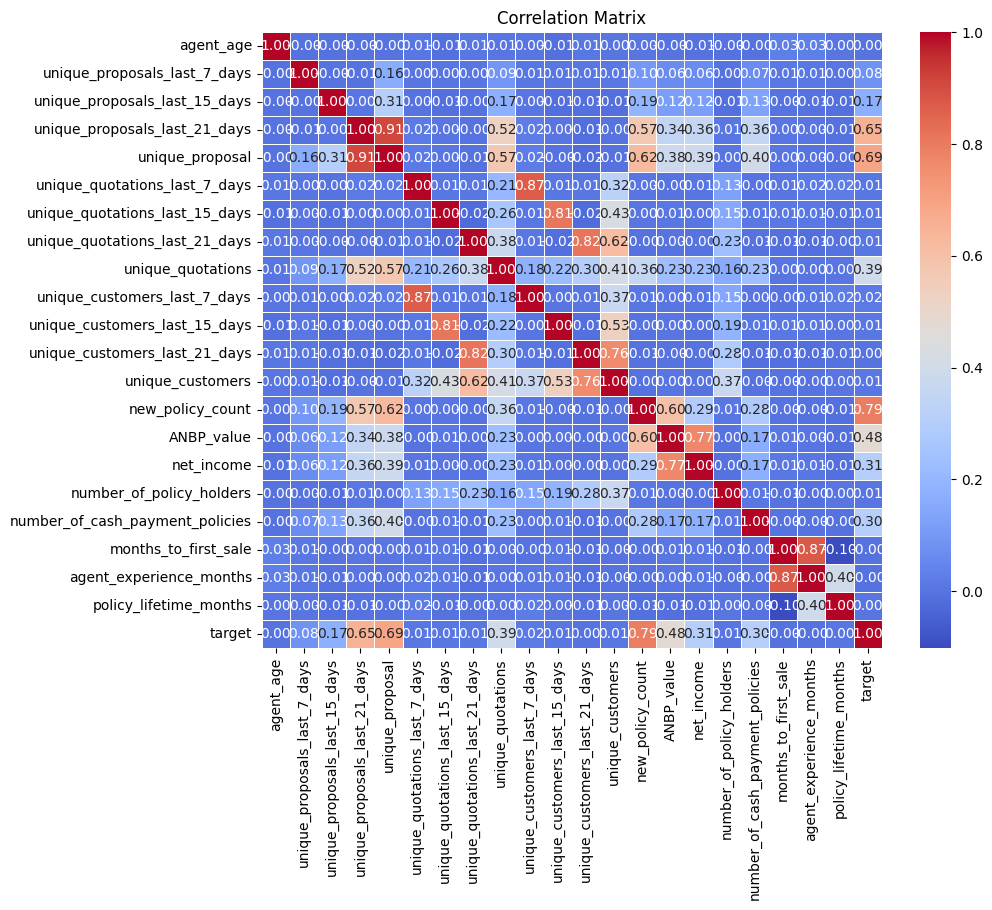

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [38]:
import pandas as pd

# Assuming df is your dataframe and target is already created
correlation = df.corr()['target'].sort_values(ascending=False)

print(correlation)


target                             1.000000
new_policy_count                   0.794716
unique_proposal                    0.690479
unique_proposals_last_21_days      0.653058
ANBP_value                         0.478382
unique_quotations                  0.393714
net_income                         0.305982
number_of_cash_payment_policies    0.304685
unique_proposals_last_15_days      0.171909
unique_proposals_last_7_days       0.084564
unique_customers_last_7_days       0.016585
unique_customers                   0.009523
unique_quotations_last_7_days      0.008756
unique_quotations_last_15_days     0.007616
unique_quotations_last_21_days     0.006130
unique_customers_last_15_days      0.006007
number_of_policy_holders           0.005512
policy_lifetime_months             0.001762
agent_age                          0.001127
unique_customers_last_21_days      0.000385
agent_experience_months           -0.003053
months_to_first_sale              -0.004245
Name: target, dtype: float64


<Figure size 1500x1000 with 0 Axes>

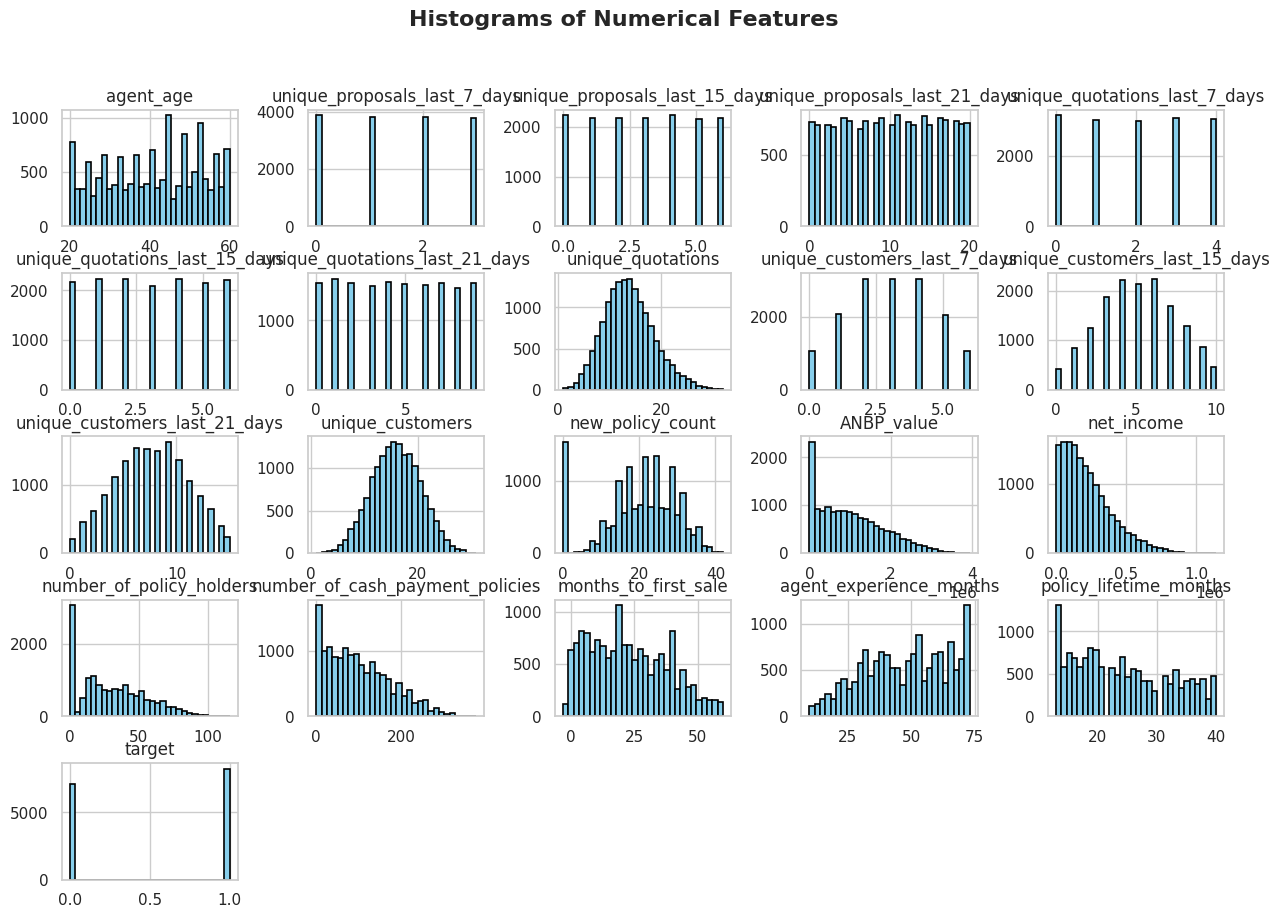

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Plot histograms for numerical features with a cleaner style
plt.figure(figsize=(15, 10))

# Plot each column separately to allow for more control over each plot
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', linewidth=1.2)

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a title to the entire plot
plt.suptitle("Histograms of Numerical Features", fontsize=16, fontweight='bold')

# Show the plot
plt.show()


In [44]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'target' is your label column
feature_df = df.drop(columns=['target'])

# Calculate the correlation matrix
corr_matrix = feature_df.corr().abs()

# Create a mask to ignore self-correlation and duplicate pairs
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply mask
corr_pairs = corr_matrix.where(~mask)

# Find all pairs with correlation above a threshold (e.g., 0.90)
threshold = 0.90
high_corr = corr_pairs.stack().reset_index()
high_corr.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr = high_corr[high_corr['Correlation'] > threshold]

# Sort by correlation
high_corr = high_corr.sort_values(by='Correlation', ascending=False)

print(high_corr)


Empty DataFrame
Columns: [Feature_1, Feature_2, Correlation]
Index: []


In [60]:
# Calculate the correlation matrix
#########Drop one feature from each highly correlated pair
corr_matrix = df.corr()

# Find pairs of features with correlation higher than a threshold (e.g., 0.9)
threshold = 0.9
high_corr_var = np.where(abs(corr_matrix) > threshold)

# Extract feature names for highly correlated pairs
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_var) if x != y and x < y]

# Drop one feature from each highly correlated pair
for feature1, feature2 in high_corr_pairs:
    print(f"Dropping {feature2} due to high correlation with {feature1}")
    df = df.drop(columns=[feature2])
    test_df=test_df.drop(columns=[feature2])




In [69]:
X_train = df.drop(['new_policy_count', 'target'], axis=1)
y_train = df['target']

X_test = test_df.drop(['new_policy_count', 'target'], axis=1)
y_test = test_df['target']


In [73]:
print(X_test.shape)

(914, 19)


In [65]:
df

,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,...,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,months_to_first_sale,agent_experience_months,policy_lifetime_months,target
0,45,3,6,2,3,0,4,9,3,4,...,15,0,0,93313,30,162,31,51,20,0
1,48,1,4,12,3,1,8,14,4,3,...,17,25,1071450,164804,0,175,22,37,15,1
2,53,3,5,5,1,6,5,14,3,7,...,21,26,1601210,426690,84,78,40,60,20,1
3,44,1,0,12,1,1,5,11,2,2,...,13,18,283230,47793,39,144,32,70,38,0
4,20,0,6,10,3,6,2,13,3,10,...,19,20,1957680,562239,19,40,29,56,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,43,1,6,6,1,2,5,10,3,4,...,18,25,2473900,404980,18,100,54,73,19,1
15304,28,1,5,3,2,3,8,14,4,3,...,18,15,922050,198187,18,120,18,32,14,0
15305,45,0,6,17,4,6,3,22,6,7,...,19,30,645330,133263,57,270,39,52,13,1
15306,25,0,4,6,4,1,5,13,6,3,...,15,0,0,32546,30,171,24,41,17,0


In [74]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Split your data into training and validation sets
from sklearn.model_selection import train_test_split

# Assuming train_df is your dataframe
X = df.drop('target', axis=1)  # Replace 'target_column' with the actual name
y = df['target']  # Replace 'target_column' with the actual name

# Split into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Import necessary models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Step 3: Train different models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Step 4: Evaluate models on the validation set
from sklearn.metrics import accuracy_score

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model



Random Forest Accuracy: 1.0000
Logistic Regression Accuracy: 0.8093
Support Vector Classifier Accuracy: 0.8266
K-Nearest Neighbors Accuracy: 0.6865
Decision Tree Accuracy: 1.0000


In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Prepare data - ensure test has same features as train
X = df.drop('target', axis=1)
y = df['target']

# Split before any preprocessing to avoid leakage
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize and fit scaler ONLY on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert back to DataFrames to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_train.columns)

# 3. Train and evaluate models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# 4. For final test data prediction:
# First ensure test data has identical features
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)
X_test_scaled = scaler.transform(test_df)
predictions = best_model.predict(X_test_scaled)

Random Forest Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Support Vector Classifier Accuracy: 0.9931
K-Nearest Neighbors Accuracy: 0.9308
Decision Tree Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
submission = pd.DataFrame({
    'row_id': row_ids,
    'target_column':predictions
})

# Save to CSV
submission.to_csv("submission--3.csv", index=False)